# Necessary Imports

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import pandas as pd
import glob
import random
import os
from tifffile import imsave
import splitfolders
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from torch.nn import CrossEntropyLoss
from matplotlib import pyplot as plt
import random
mmscaler = MinMaxScaler()
import pandas as pd
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from random import shuffle
import PIL
from PIL import Image
import copy
import cv2
import glob
import cv2
import os 
from os import path
from skimage.color import lab2rgb
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import MaxPool3d
from torch.nn import AvgPool3d
from torch.nn import Linear, ReLU, MSELoss, Sequential, Conv2d, Conv3d, ConvTranspose3d, BatchNorm3d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout, ConvTranspose2d
from torch.optim import Adam, SGD
from math import log10, sqrt
import numpy as np
from skimage.metrics import structural_similarity
import argparse
import imutils
torch.set_default_tensor_type('torch.FloatTensor')

# Loading one training example

# Data Scaling

In [18]:
train_path = 'BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
test_flair=nib.load(train_path + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
test_flair=mmscaler.fit_transform(test_flair.reshape(-1, test_flair.shape[-1])).reshape(test_flair.shape)
test_t1=nib.load(train_path + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
test_t1=mmscaler.fit_transform(test_t1.reshape(-1, test_t1.shape[-1])).reshape(test_t1.shape)
test_t1ce=nib.load(train_path + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
test_t1ce=mmscaler.fit_transform(test_t1ce.reshape(-1, test_t1ce.shape[-1])).reshape(test_t1ce.shape)
test_t2=nib.load(train_path + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
test_t2=mmscaler.fit_transform(test_t2.reshape(-1, test_t2.shape[-1])).reshape(test_t2.shape)

**Original dataset has the following annotations:**


GD-enhancing tumor: Label 4

Peritumoral edema: Label 2

Necrotic and non-enhancing tumor core (NCR/NET): Label 1

Normal/Non-tumor: Label 0

In [20]:
#Converting label 4 to label 3 because we are not using t1 MRI scans for prediction (Literature Review)
test_seg_mask=nib.load(train_path + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
test_seg_mask=test_seg_mask.astype(np.uint8)
print(np.unique(test_seg_mask))  
test_seg_mask[test_seg_mask==4] = 3  
print(np.unique(test_seg_mask))

[0 1 2 4]
[0 1 2 3]


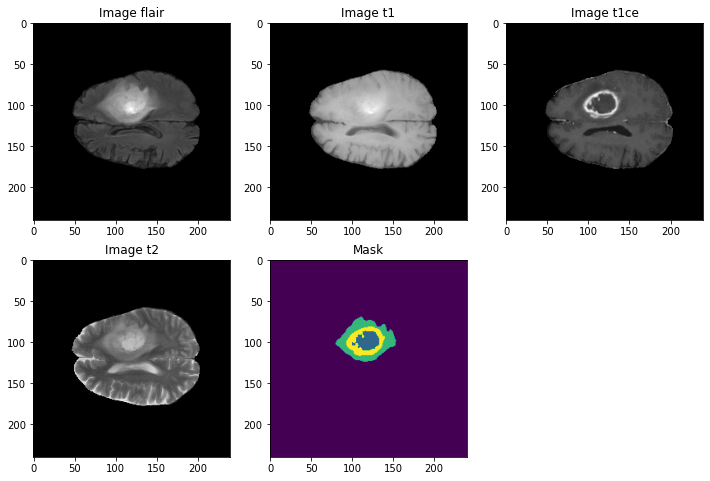

In [21]:

n_slice=random.randint(0, test_seg_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_seg_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

# Data Cropping

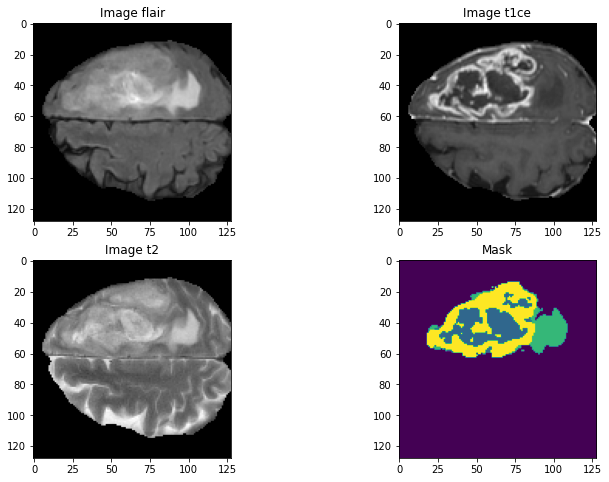

<ipython-input-22-b54b7082c3b1>:29: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('./BraTS2020_TrainingData/combined255.tif', combined_x)


In [22]:
combined_x = np.stack([test_flair, test_t1ce, test_t2], axis=3)
combined_x=combined_x[56:184, 56:184, 13:141] 
test_seg_mask = test_seg_mask[56:184, 56:184, 13:141]

n_slice=random.randint(0, test_seg_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_seg_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

imsave('./BraTS2020_TrainingData/combined255.tif', combined_x)
np.save('./BraTS2020_TrainingData/combined255.npy', combined_x)

my_img=np.load('./BraTS2020_TrainingData/combined255.npy')

test_seg_mask = to_categorical(test_seg_mask, num_classes=4)

# Dataset preparation

In [21]:
#We perform data scaling and croping for all MRI images and prepare the dataloaders

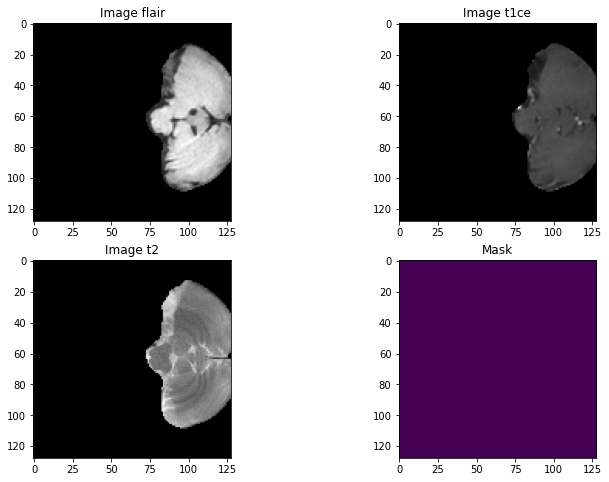

<ipython-input-30-5df45b94a628>:29: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('./BraTS2020_TrainingData/combined255.tif', combined_x)


img and mask no.:  0
Save Me
img and mask no.:  1
Save Me
img and mask no.:  2
Save Me
img and mask no.:  3
Save Me
img and mask no.:  4
I am useless
img and mask no.:  5
Save Me
img and mask no.:  6
Save Me
img and mask no.:  7
Save Me
img and mask no.:  8
Save Me
img and mask no.:  9
Save Me
img and mask no.:  10
Save Me
img and mask no.:  11
Save Me
img and mask no.:  12
Save Me
img and mask no.:  13
Save Me
img and mask no.:  14
Save Me
img and mask no.:  15
Save Me
img and mask no.:  16
Save Me
img and mask no.:  17
Save Me
img and mask no.:  18
Save Me
img and mask no.:  19
Save Me
img and mask no.:  20
Save Me
img and mask no.:  21
Save Me
img and mask no.:  22
Save Me
img and mask no.:  23
Save Me
img and mask no.:  24
Save Me
img and mask no.:  25
Save Me
img and mask no.:  26
Save Me
img and mask no.:  27
I am useless
img and mask no.:  28
Save Me
img and mask no.:  29
Save Me
img and mask no.:  30
Save Me
img and mask no.:  31
Save Me
img and mask no.:  32
Save Me
img and ma

img and mask no.:  265
Save Me
img and mask no.:  266
Save Me
img and mask no.:  267
I am useless
img and mask no.:  268
Save Me
img and mask no.:  269
Save Me
img and mask no.:  270
Save Me
img and mask no.:  271
Save Me
img and mask no.:  272
Save Me
img and mask no.:  273
Save Me
img and mask no.:  274
Save Me
img and mask no.:  275
Save Me
img and mask no.:  276
I am useless
img and mask no.:  277
Save Me
img and mask no.:  278
Save Me
img and mask no.:  279
Save Me
img and mask no.:  280
Save Me
img and mask no.:  281
Save Me
img and mask no.:  282
Save Me
img and mask no.:  283
Save Me
img and mask no.:  284
Save Me
img and mask no.:  285
Save Me
img and mask no.:  286
Save Me
img and mask no.:  287
Save Me
img and mask no.:  288
Save Me
img and mask no.:  289
Save Me
img and mask no.:  290
Save Me
img and mask no.:  291
Save Me
img and mask no.:  292
Save Me
img and mask no.:  293
Save Me
img and mask no.:  294
Save Me
img and mask no.:  295
Save Me
img and mask no.:  296
Save M

Copying files: 688 files [00:16, 41.91 files/s]


In [30]:
t2_img_list = sorted(glob.glob('./BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
t1ce_img_list = sorted(glob.glob('./BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_img_list = sorted(glob.glob('./BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_img_list = sorted(glob.glob('./BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))


for img in range(len(t2_img_list)): 
    print("img and mask no.: ", img)
      
    temp_t2=nib.load(t2_img_list[img]).get_fdata()
    temp_t2=mmscaler.fit_transform(temp_t2.reshape(-1, temp_t2.shape[-1])).reshape(temp_t2.shape)
   
    temp_t1ce=nib.load(t1ce_img_list[img]).get_fdata()
    temp_t1ce=mmscaler.fit_transform(temp_t1ce.reshape(-1, temp_t1ce.shape[-1])).reshape(temp_t1ce.shape)
   
    temp_flair=nib.load(flair_img_list[img]).get_fdata()
    temp_flair=mmscaler.fit_transform(temp_flair.reshape(-1, temp_flair.shape[-1])).reshape(temp_flair.shape)
        
    temp_mask=nib.load(mask_img_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3 
  
    
    
    temp_combined_images = np.stack([temp_flair, temp_t1ce, temp_t2], axis=3)
    

    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.01:
        print("Saving the image")
        temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('./BraTS2020_TrainingData/input_data_3channels/images/image_'+str(img)+'.npy', temp_combined_images)
        np.save('./BraTS2020_TrainingData/input_data_3channels/masks/mask_'+str(img)+'.npy', temp_mask)
        
    else:
        print("The image is not good enough for training set")   
   

input_path = './BraTS2020_TrainingData/input_data_3channels/'
output_path = './BraTS2020_TrainingData/input_data_128/'
splitfolders.ratio(input_path, output=output_path, seed=42, ratio=(.75, .25), group_prefix=None)

In [36]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)




def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y)   

            batch_start += batch_size   
            batch_end += batch_size


# Data Loaders

In [107]:
train_img_dir = "BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "BraTS2020_TrainingData/input_data_128/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

img, msk = train_img_datagen.__next__()

# 3D Convolutional Neural Network

In [10]:
class Convnet(nn.Module):   
    def __init__(self):
        super(Convnet, self).__init__()

        self.convolution_layers = Sequential(
            Conv3d(3, 8, kernel_size=3, stride=1, padding=1),
            BatchNorm3d(8),
            nn.ReLU(),
            Conv3d(8, 16, kernel_size=3, stride=1, padding=1),
            BatchNorm3d(16),
            nn.ReLU(),
            Conv3d(16, 32, kernel_size=3, stride=1, padding=1),
            BatchNorm3d(32),
            nn.ReLU()
        )
        
        self.deconvolution_layers = Sequential(
            ConvTranspose3d(32, 16, kernel_size=3, stride=1, padding=1),
            BatchNorm3d(16),
            nn.ReLU(),
            ConvTranspose3d(16, 8, kernel_size=3, stride=1, padding=1),
            BatchNorm3d(8),
            nn.ReLU(),
            ConvTranspose3d(8, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm3d(4),
            nn.ReLU()
        )
        


    # Defining the forward pass    
    def forward(self, x):
        x = self.convolution_layers(x)
        x = self.deconvolution_layers(x)
        #print(x.shape)
        return x

In [2]:
train_path_images = 'BraTS2020_TrainingData/input_data_128/train/images'
train_path_masks = 'BraTS2020_TrainingData/input_data_128/train/masks'

In [3]:
all_train_images = []
for file in os.listdir(train_path_images):
    img = np.load(train_path_images+'/'+file)
    all_train_images.append(img)
all_train_images = np.asarray(all_train_images)
all_train_masks = []
for file in os.listdir(train_path_masks):
    img = np.load(train_path_masks+'/'+file)
    all_train_masks.append(img)
all_train_masks = np.asarray(all_train_masks)

In [7]:
all_train_images = torch.tensor(all_train_images)
all_train_masks = torch.tensor(all_train_masks)

In [ ]:
device="cpu"
print("Device", device)


batch_size = 2
num_epochs = 5
N=258
learning_rate = 0.01
batches = int(N/batch_size)


model = Convnet()
model = model.float()
model.to(device)

train_data=copy.deepcopy(all_train_images)
train_data = train_data.to(device)
print("Printing train data shape")
print(train_data.shape)
train_mask = all_train_masks.to(device)
print("Printing train mask shape")
print(train_mask.shape)
#test_data = copy.deepcopy(test_L)
#test_data = test_data.to(device)
#print("Printing test data shape")
#print(test_data.shape)
#test_ab = test_ab.to(device)
#print("Printing test ab shape")
#print(test_ab.shape)


error = nn.CrossEntropyLoss()  # This works well with the linear output layer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print("batch_size:",batch_size)
print('num_epochs:',num_epochs)
print("learning_rate:",learning_rate)
print("batches:",batches)
print("optimizer:",'Adam')
print("Loss function:","CrossEntropyLoss")
print(model)

loss_hist = np.zeros(num_epochs)
#loss_test_hist = np.zeros(num_epochs)

for epoch in range(num_epochs):
    for index in range(batches):
        patterns = train_data[index*batch_size:(index+1)*batch_size]
        labels = train_mask[index*batch_size:(index+1)*batch_size]
        
        train = Variable(patterns.view(batch_size,3,128,128,128))
        train = train.float()
        masks = Variable(labels.view(batch_size,4,128,128,128))
        masks = masks.float()
        
        #print("printing all labels shape")
        #print(labels.shape)
        # Forward pass 
        outputs = model(train)
        loss = error(outputs, masks)
        

        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()

        #Propagating the error backward
        loss.backward()

        # Optimizing the parameters
        optimizer.step()
        
        #Saving the loss for visualization
        loss_hist[epoch] += loss.data
        

    #test_total
    #patterns = test_data
    #labels = test_ab
    #outputs = model(patterns)
    #is_correct = torch.subtract(labels,outputs)
    #loss_test_hist[epoch] += (is_correct.sum()*is_correct.sum())/test_size

    if epoch%10==0:
        print("Epoch: {}, Loss: {:.7f}".format( epoch, loss_hist[epoch]))



plt.figure()
plt.plot(loss_hist)
plt.xlabel("epoch")
plt.ylabel("Cross Entropy Loss")
plt.title("Brain Tumor Segmentation")
plt.legend("Training Loss")
plt.show()

In [24]:
print("Device", device)
print("batch_size:",batch_size)
print('num_epochs:',num_epochs)
print("learning_rate:",learning_rate)
print("batches:",batches)
print("optimizer:",'Adam')
print("Loss function:","CrossEntropyLoss")
print(model)

Device cpu
batch_size: 2
num_epochs: 5
learning_rate: 0.01
batches: 129
optimizer: Adam
Loss function: CrossEntropyLoss
Convnet(
  (convolution_layers): Sequential(
    (0): Conv3d(3, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (7): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
  )
  (deconvolution_layers): Sequential(
    (0): ConvTranspose3d(32, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose3d(16, 8, 

In [23]:
print("Epoch: {}, Loss: {:.7f}".format( epoch, loss_hist[epoch]))

Epoch: 4, Loss: 178.8317108


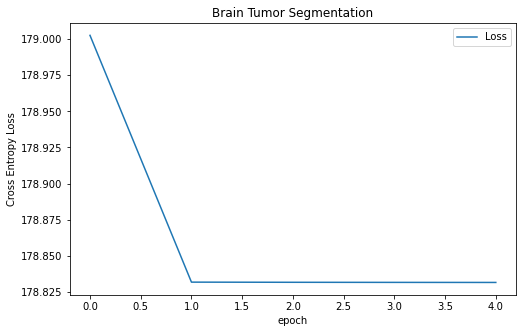

In [28]:
plt.figure(figsize=(8,5))
plt.plot(loss_hist)
plt.xlabel("epoch")
plt.ylabel("Cross Entropy Loss")
plt.title("Brain Tumor Segmentation")
plt.legend(["Loss"])
plt.show()

In [12]:
#Saving the model
torch.save(model, './BraTS_CNN.pkl')

# Prediction for one example

In [14]:
test_image=all_train_images[0]
test_image=Variable(test_image.view(1,3,128,128,128))
test_image=test_image.float()
test_image=test_image.to(device)
test_image_output=model(test_image)
test_image_output=test_image_output.squeeze()
f = test_image_output.detach()
p=np.array(f.cpu())
data = np.moveaxis(p, 0, 3)
test_seg_mask=np.argmax(data, axis=3)

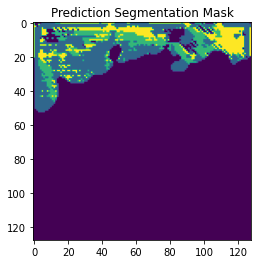

In [19]:
n_slice=random.randint(0, test_seg_mask.shape[2])
plt.imshow(test_seg_mask[:,:,n_slice])
plt.title('Prediction Segmentation Mask')
plt.show()

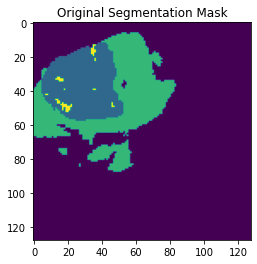

In [20]:
or_seg_mask = np.argmax(all_train_masks[0],axis=3)
plt.imshow(or_seg_mask[:,:,n_slice])
plt.title('Original Segmentation Mask')
plt.show()

# CNN with max pooling

In [31]:
class Convnet2(nn.Module):   
    def __init__(self):
        super(Convnet2, self).__init__()

        self.convolution_layers = Sequential(
            Conv3d(3, 8, kernel_size=3, stride=1, padding=1),
            BatchNorm3d(8),
            MaxPool3d(kernel_size=2, stride=2),
            nn.ReLU(),
            Conv3d(4, 16, kernel_size=3, stride=1, padding=1),
            BatchNorm3d(16),
            MaxPool3d(kernel_size=2, stride=2),
            nn.ReLU(),
            Conv3d(8, 32, kernel_size=3, stride=1, padding=1),
            BatchNorm3d(32),
            MaxPool3d(kernel_size=2, stride=2),
            nn.ReLU(),
            Conv3d(16, 64, kernel_size=3, stride=1, padding=1),
            BatchNorm3d(64),
            AvgPool3d(kernel_size=4, stride=4),
            MaxPool3d(kernel_size=4, stride=4),
            nn.ReLU(),
        )
        


    # Defining the forward pass    
    def forward(self, x):
        x = self.convolution_layers(x)
        print(x.shape)
        #x = self.deconvolution_layers(x)
        #print(x.shape)
        return x

In [ ]:
model = Convnet2()
model = model.float()
model.to(device)
patterns = all_train_images[0]
#labels = train_mask[index*batch_size:(index+1)*batch_size]

train = Variable(patterns.view(1,3,128,128,128))
train = train.float()
#masks = Variable(labels.view(batch_size,4,128,128,128))
#masks = masks.float()
model(train)

In [33]:
print(patterns.shape)

torch.Size([128, 128, 128, 3])


In [34]:
print(train.shape)

torch.Size([1, 3, 128, 128, 128])
